# New Store Business in Toronto

## Introduction/Business Problem

Our client is a commercial group (family business) and its current business focuses on various stores across North America, such as Clothing Stores, Health Food Stores, Beer 
Stores, etc. The client/company wants to expand its business into Toronto city and our goal is to define the right business 
expansion strategy for the company.

* What kind of business/store should the company consider in order to achieve the most possible success? 
* Which district in Toronto city should the Store be located? 

![Image of Store Type](http://2bsiwtsz6ylibiex20hddm1c-wpengine.netdna-ssl.com/wp-content/uploads/2013/04/mapoftorontoneighbourhoods.jpg)
<center>the Best Neighborhoods to do Business in Toronto By iQ Office Suites</center>

## Data acquisition and processing

We have already generated the venue matrix of Toronto city using Foursquaresoup API and data scraped from the wikipedia webpage:

https://developer.foursquare.com/places-api

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

We can process the venue matrix and group rows by neighborhood and by taking the sum of the frequency of occurrence of each category.
By adding the frequency of ocurrence of each store type in different districts, we can get the total number for each store type in Toronto city.
Once we have the distribution of store type, we can suggest which type of store is the most common and what kind of store is mostly welcomed recently.

From the Statistics of Canada, we can also easily get the data about population census in each district of Toronto.
By analyzing the population relationship with different combination of store type, we can define the store type in the exact district to cater for its potential future population growth.

## Methodology 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


source = requests.get ('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup (source, 'lxml')
article = soup.find('body')
table = article.find('table', class_='wikitable sortable')
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td') 
    # replace \n in the text
    row = [tr.text.replace("\n", "") for tr in td] 
    # expand the tuple with new data points
    res.append(row) 

# The dataframe consists of three columns: PostalCode, Borough, and Neighborhood
df = pd.DataFrame(res, columns=["Postcode", "Borough", "Neighbourhood"])
# delete cells with a borough that is NA
df.dropna(subset=['Borough'],inplace=True)
# delete cells with a borough that is Not assigned
df.drop(df[df['Borough'] == "Not assigned"].index, inplace=True)
# assign the value of borough to Neighbourhood if the value of Neighbourhood is not assigned
df['Neighbourhood'] = df.apply(lambda row: row['Borough'] if row['Neighbourhood']=="Not assigned" else row['Neighbourhood'], axis=1)
# combine two rows with the same neighborhoods and separate them with comma
df=df.groupby(['Postcode','Borough'], as_index=False).agg(','.join)
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [2]:
import urllib.request
urllib.request.urlretrieve(url = "http://cocl.us/Geospatial_data", filename = "/home/dsxuser/work/Geospatial_Coordinates.csv")
geodata = pd.read_csv("/home/dsxuser/work/Geospatial_Coordinates.csv")
geodata = geodata.rename({'Postal Code': 'Postcode'}, axis=1)
new_df = pd.merge(df, geodata[['Postcode','Latitude','Longitude']],on='Postcode')
new_df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [3]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
CLIENT_ID = 'EF454CIM4LCSDHAV33JFKUGHN2T1DJICT33G2Q5W4UBCSZX1' # your Foursquare ID
CLIENT_SECRET = 'XXW2QYN2AVTIQNLPATAREYDANYIKRGIXJ4DGGRAWPKT33AX4' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

# limit of number of venues returned by Foursquare API
LIMIT = 100 
# define radius
radius = 500 

Solving environment: done

# All requested packages already installed.

Your credentails:
CLIENT_ID: EF454CIM4LCSDHAV33JFKUGHN2T1DJICT33G2Q5W4UBCSZX1
CLIENT_SECRET:XXW2QYN2AVTIQNLPATAREYDANYIKRGIXJ4DGGRAWPKT33AX4


Let's use Foursquare API to fetch venue information under LIMIT and around radius of different district in Toronto

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


toronto_venues = getNearbyVenues(names=new_df['Neighbourhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude'],radius=500
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beaches West,Indi

In [5]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot


toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide,King,Richmond",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"Alderwood,Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Bathurst Manor,Downsview North,Wilson Heights",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,Bayview Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"Bedford Park,Lawrence Manor East",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Berczy Park,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,"Birch Cliff,Cliffside West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
a_toronto = toronto_grouped.loc[:,toronto_grouped.columns.str.contains('Store')]
a_toronto['Neighborhood'] = toronto_grouped['Neighborhood'] 
fixed_columns1 = [a_toronto.columns[-1]] + list(a_toronto.columns[:-1])
b_toronto = a_toronto[fixed_columns1]

b_toronto.loc['Total',:]= b_toronto.sum(axis=0)
b_toronto.loc[:,'Total']= b_toronto.sum(axis=1)
b_toronto

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,Accessories Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store,...,Pet Store,Shoe Store,Stationery Store,Thrift / Vintage Store,Toy / Game Store,Video Game Store,Video Store,Warehouse Store,Women's Store,Total
0,"Adelaide,King,Richmond",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
4,"Alderwood,Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Bathurst Manor,Downsview North,Wilson Heights",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Bedford Park,Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
9,"Birch Cliff,Cliffside West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the above venue matrix, we know the most common/popular types of stores in Toronto City.  

In [7]:
total_toronto = pd.concat([ b_toronto.tail(1)])
total_toronto = total_toronto.drop(columns=['Neighborhood','Total'])
total_toronto_T = total_toronto.T
total_toronto_R = total_toronto_T.sort_values(by='Total', ascending=False)
total_toronto_R = total_toronto_R.iloc[0:12,]
total_toronto_R = total_toronto_R.T
total_toronto_R

,Clothing Store,Grocery Store,Liquor Store,Furniture / Home Store,Discount Store,Convenience Store,Beer Store,Pet Store,Department Store,Electronics Store,Arts & Crafts Store,Women's Store
Total,32.0,27.0,17.0,13.0,12.0,10.0,9.0,8.0,8.0,8.0,6.0,5.0


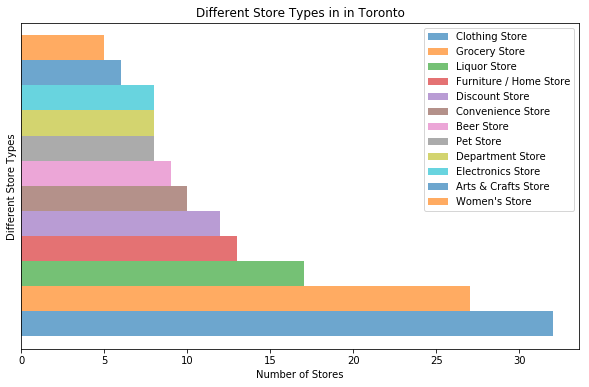

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
total_toronto_R.plot(kind='barh', figsize=(10, 6), width=6, alpha=0.65)

plt.xlabel('Number of Stores') # add to x-label to the plot
plt.ylabel('Different Store Types') # add y-label to the plot
plt.title('Different Store Types in in Toronto') # add title to the plot

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)
    
plt.show()

In [9]:
total_toronto1 = b_toronto[['Neighborhood','Total']]
total_toronto1 = total_toronto1.drop(['Total'])
total_toronto_R1 = total_toronto1.sort_values(by='Total', ascending=False)
total_toronto_R1 = total_toronto_R1.iloc[0:8,]
total_toronto_R1 = total_toronto_R1.reset_index()

total_toronto_R1 = total_toronto_R1.T
total_toronto_R1 = total_toronto_R1.drop(['index'])
total_toronto_R1.columns = total_toronto_R1.iloc[0]
total_toronto_R1 = total_toronto_R1[1:]
total_toronto_R1

Neighborhood,"Fairview,Henry Farm,Oriole","Ryerson,Garden District","Lawrence Heights,Lawrence Manor",Leaside,St. James Town,"Chinatown,Grange Park,Kensington Market",Central Bay Street,Church and Wellesley
Total,20,13,10,9,9,7,6,6


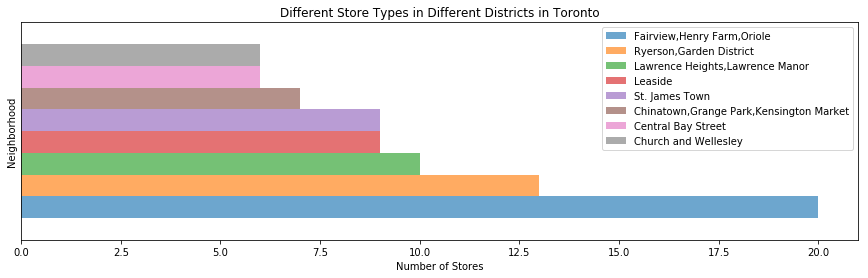

In [10]:
total_toronto_R1.plot(kind='barh', figsize=(15, 4), width=2, alpha=0.65)

plt.xlabel('Number of Stores') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Different Store Types in Different Districts in Toronto') # add title to the plot
plt.legend(prop={'size': 10})

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)
    
plt.show()

In [12]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = b_toronto['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(b_toronto.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Total,Clothing Store,Department Store,Electronics Store,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store
1,Agincourt,Total,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Total,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Total,Grocery Store,Video Store,Beer Store,Liquor Store,Arts & Crafts Store,Baby Store,Camera Store,Candy Store,Health Food Store
4,"Alderwood,Long Branch",Total,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store
5,"Bathurst Manor,Downsview North,Wilson Heights",Total,Video Store,Health Food Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store
6,Bayview Village,Total,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store
7,"Bedford Park,Lawrence Manor East",Total,Liquor Store,Grocery Store,Health Food Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store
8,Berczy Park,Total,Clothing Store,Liquor Store,Health Food Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Convenience Store
9,"Birch Cliff,Cliffside West",Total,Women's Store,Arts & Crafts Store,Baby Store,Beer Store,Camera Store,Candy Store,Clothing Store,Convenience Store,Department Store


We can analyze the top 3 districts which have the most venues/stores, top1: Fairview,Henry Farm,Oriole, top2: Ryerson,Garden District, and top3: Lawrence Heights,Lawrence Manor.

In [13]:
fho_toronto = a_toronto.loc[a_toronto['Neighborhood'] == 'Fairview,Henry Farm,Oriole']
fho_toronto = fho_toronto.drop(columns = ['Neighborhood'])
fho_toronto_R = fho_toronto.sort_values(by=43, ascending=False, axis=1)
fho_toronto_R = fho_toronto_R.loc[:, (fho_toronto_R!= 0).any(axis=0)]

fho_toronto_R

,Clothing Store,Kids Store,Toy / Game Store,Women's Store,Department Store,Shoe Store,Electronics Store,Liquor Store,Luggage Store,Candy Store,Video Game Store
43,8,2,2,1,1,1,1,1,1,1,1


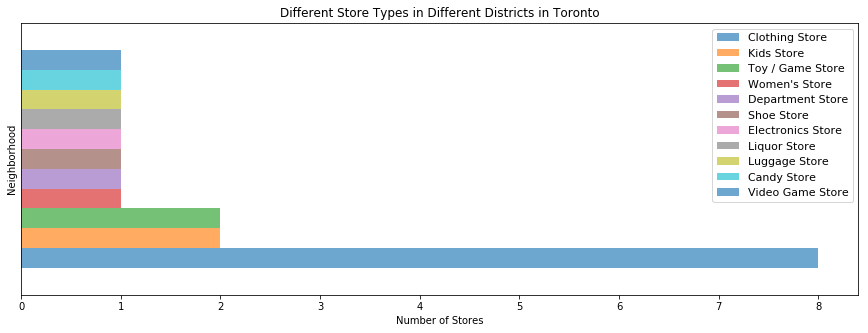

In [14]:
fho_toronto_R.plot(kind='barh', figsize=(15, 5), width=2, alpha=0.65)

plt.xlabel('Number of Stores') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Different Store Types in Different Districts in Toronto') # add title to the plot
plt.legend(prop={'size': 11})

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)
    
plt.show()

In [15]:
rg_toronto = a_toronto.loc[a_toronto['Neighborhood'] == 'Ryerson,Garden District']
rg_toronto = rg_toronto.drop(columns = ['Neighborhood'])
rg_toronto_R = rg_toronto.sort_values(by=78, ascending=False, axis=1)
rg_toronto_R = rg_toronto_R.loc[:, (rg_toronto_R!= 0).any(axis=0)]

rg_toronto_R

,Clothing Store,Department Store,Video Game Store,Toy / Game Store,Lingerie Store,Furniture / Home Store,Shoe Store
78,7,1,1,1,1,1,1


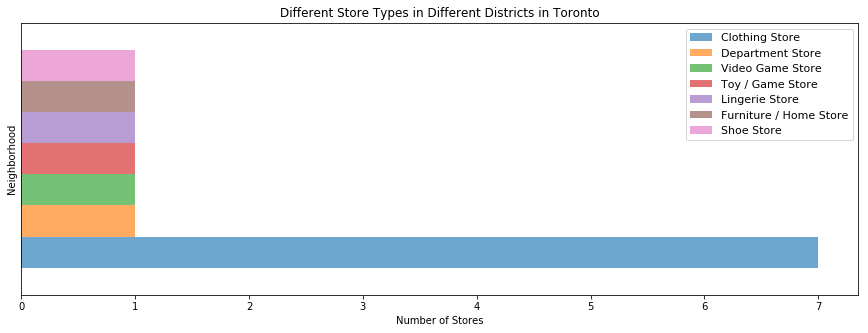

In [16]:
rg_toronto_R.plot(kind='barh', figsize=(15, 5), width=2, alpha=0.65)

plt.xlabel('Number of Stores') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Different Store Types in Different Districts in Toronto') # add title to the plot
plt.legend(prop={'size': 11})

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)
    
plt.show()


In [17]:
lhlm_toronto = a_toronto.loc[a_toronto['Neighborhood'] == 'Lawrence Heights,Lawrence Manor']
lhlm_toronto = lhlm_toronto.drop(columns = ['Neighborhood'])
lhlm_toronto_R = lhlm_toronto.sort_values(by=62, ascending=False, axis=1)
lhlm_toronto_R = lhlm_toronto_R.loc[:, (lhlm_toronto_R!= 0).any(axis=0)]

lhlm_toronto_R

,Clothing Store,Furniture / Home Store,Women's Store,Accessories Store
62,4,3,2,1


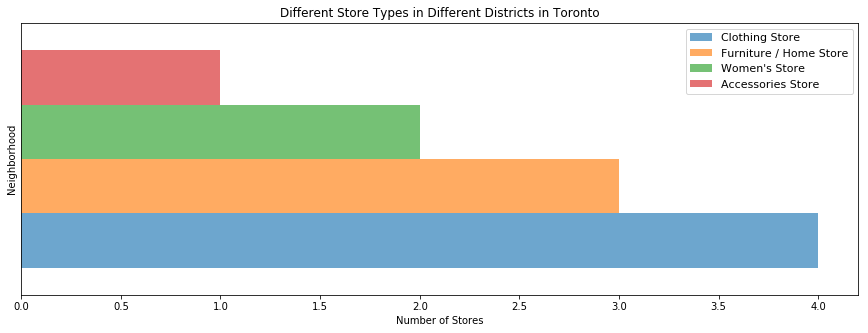

In [18]:
lhlm_toronto_R.plot(kind='barh', figsize=(15, 5), width=2, alpha=0.65)

plt.xlabel('Number of Stores') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Different Store Types in Different Districts in Toronto') # add title to the plot
plt.legend(prop={'size': 11})

frame1 = plt.gca()
for xlabel_i in frame1.axes.get_yticklabels():
    xlabel_i.set_fontsize(0.0)
    xlabel_i.set_visible(False)
for tick in frame1.axes.get_yticklines():
    tick.set_visible(False)
    
plt.show()


## Result

In [19]:
new_df1 = new_df [new_df['Neighbourhood'].isin(['Fairview,Henry Farm,Oriole', 'Ryerson,Garden District', 'Lawrence Heights,Lawrence Manor'])]
new_df1

,Postcode,Borough,Neighbourhood,Latitude,Longitude
18,M2J,North York,"Fairview,Henry Farm,Oriole",43.778517,-79.346556
54,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
71,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763


In [21]:
address = 'Toronto'
geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

# add markers to map
for lat, lng, borough, neighborhood in zip(new_df1['Latitude'], new_df1['Longitude'], new_df1['Borough'], new_df1['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Discussion

## Conclusion